In [ ]:
#importing the Libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the Dataset
dataset = pd.read_csv('insurance_pre.csv')

In [ ]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [ ]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [ ]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [ ]:
indep=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
dep=dataset['charges']

In [ ]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, refit = True, verbose = 3 ,n_jobs=-1, cv=2)
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 2 folds for each of 216 candidates, totalling 432 fits


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

In [ ]:
# Assuming 'grid' is your GridSearchCV object that has been fitted to the data
best_model = grid.best_estimator_

In [ ]:
# Predict using the best model
y_pred = best_model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

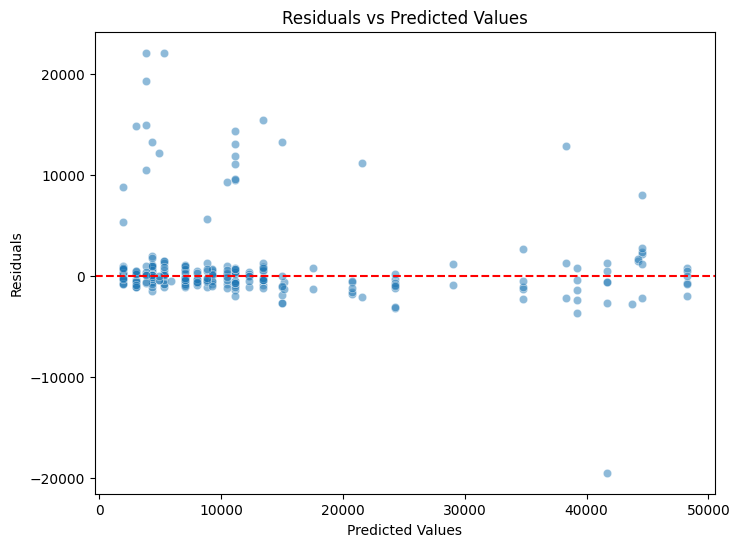

In [ ]:
# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Assuming 'grid' is your GridSearchCV object and has been fitted to the data
print("Best parameters:", grid.best_params_)

# Access the mean test score for the best parameters
best_index = grid.best_index_
best_r2_score = grid.cv_results_['mean_test_score'][best_index]
# Printing the best R² score
print("r2:",best_r2_score)

Best parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
r2: 0.8384643306853703


In [ ]:
table=pd.DataFrame.from_dict(grid.cv_results_)

In [ ]:
table.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
142,0.013174,0.004681,0.001364,0.000194,absolute_error,5,4,10,best,"{'criterion': 'absolute_error', 'max_depth': 5...",0.848889,0.828040,0.838464,0.010425,1
138,0.008425,0.000179,0.001002,0.000044,absolute_error,5,4,2,best,"{'criterion': 'absolute_error', 'max_depth': 5...",0.848797,0.828123,0.838460,0.010337,2
140,0.008602,0.000154,0.001092,0.000017,absolute_error,5,4,5,best,"{'criterion': 'absolute_error', 'max_depth': 5...",0.848797,0.828123,0.838460,0.010337,2
136,0.008118,0.000480,0.001030,0.000023,absolute_error,5,2,10,best,"{'criterion': 'absolute_error', 'max_depth': 5...",0.843339,0.828125,0.835732,0.007607,4
132,0.008630,0.000172,0.000953,0.000072,absolute_error,5,2,2,best,"{'criterion': 'absolute_error', 'max_depth': 5...",0.843403,0.827879,0.835641,0.007762,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.002505,0.000131,0.001183,0.000093,friedman_mse,None,1,2,random,"{'criterion': 'friedman_mse', 'max_depth': Non...",0.639780,0.648790,0.644285,0.004505,212
1,0.002775,0.000429,0.001191,0.000037,squared_error,None,1,2,random,"{'criterion': 'squared_error', 'max_depth': No...",0.593029,0.682945,0.637987,0.044958,213
91,0.001653,0.000081,0.000856,0.000060,friedman_mse,10,1,2,random,"{'criterion': 'friedman_mse', 'max_depth': 10,...",0.597165,0.674449,0.635807,0.038642,214
54,0.003321,0.000126,0.001390,0.000084,friedman_mse,None,1,2,best,"{'criterion': 'friedman_mse', 'max_depth': Non...",0.610921,0.657988,0.634454,0.023534,215


In [ ]:
import pickle
filename="RF_G.sav"
pickle.dump(best_model,open(filename,'wb'))